In [8]:
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
g = nx.karate_club_graph()
print(nx.info(g))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


In [26]:
k = 3
cover = list(nx.community.k_clique_communities(g, k, cliques=None))
len(cover)

3

In [27]:
dict_commts = {}
for idx, community in enumerate(cover): # Se recorre cada nodo
    dict_commts[idx] = list(community)
dict_commts

{0: [0,
  1,
  2,
  3,
  7,
  8,
  12,
  13,
  14,
  15,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 1: [0, 4, 5, 6, 10, 16],
 2: [24, 25, 31]}

In [28]:
# Lista para almacenar los colores de los nodos dependiendo a la comunidad que pertenecen
commty_nodes = {}

for node in g.nodes():
    flag_overlapping = False
    for idx, commty in enumerate(cover):
        if node in list(commty):      
            if not node in commty_nodes.keys():
                commty_nodes[node] = idx
            else:
                commty_nodes[node] = -1
len(commty_nodes)

32

In [29]:
color_map = []

for node in g.nodes():    
    if not node in commty_nodes.keys():
        color_map.append("gray")
    elif commty_nodes[node] == -1: # overlap node
        color_map.append("red")
    elif commty_nodes[node] == 0:
        color_map.append("blue")
    elif commty_nodes[node] == 1:
        color_map.append("orange")
    elif commty_nodes[node] == 2:
        color_map.append("green")
len(color_map)

34

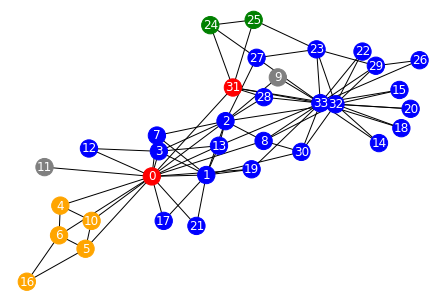

In [30]:
pos = nx.spring_layout(g) # Algoritmo de posicionamiento

# Se dibuja el grafo con los argumentos
nx.draw(g, node_color=color_map, with_labels=True, font_color='white')